In [92]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
print("Setup Complete")


Setup Complete


In [93]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


В поле Cabin всего 204 непустых значения, то есть им можно принебречь. Так же можно избавиться от Ticket и Name, так как они идентифицируют поле, а у нас уже есть PassengerId

In [96]:
data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


Проверим то, как класс билета влиял на вероятность выжить у пассажира

In [97]:
tab = pd.crosstab(index=data.Survived, columns=data.Pclass, margins=True)
tab.style.background_gradient(cmap='autumn_r')

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [98]:
print('% of survivals')
print('1 class =', tab.loc[1, 1] / tab.loc['All', 1])
print('2 class =', tab.loc[1, 2] / tab.loc['All', 2])
print('3 class =', tab.loc[1, 3] / tab.loc['All', 3])

% of survivals
1 class = 0.6296296296296297
2 class = 0.47282608695652173
3 class = 0.24236252545824846


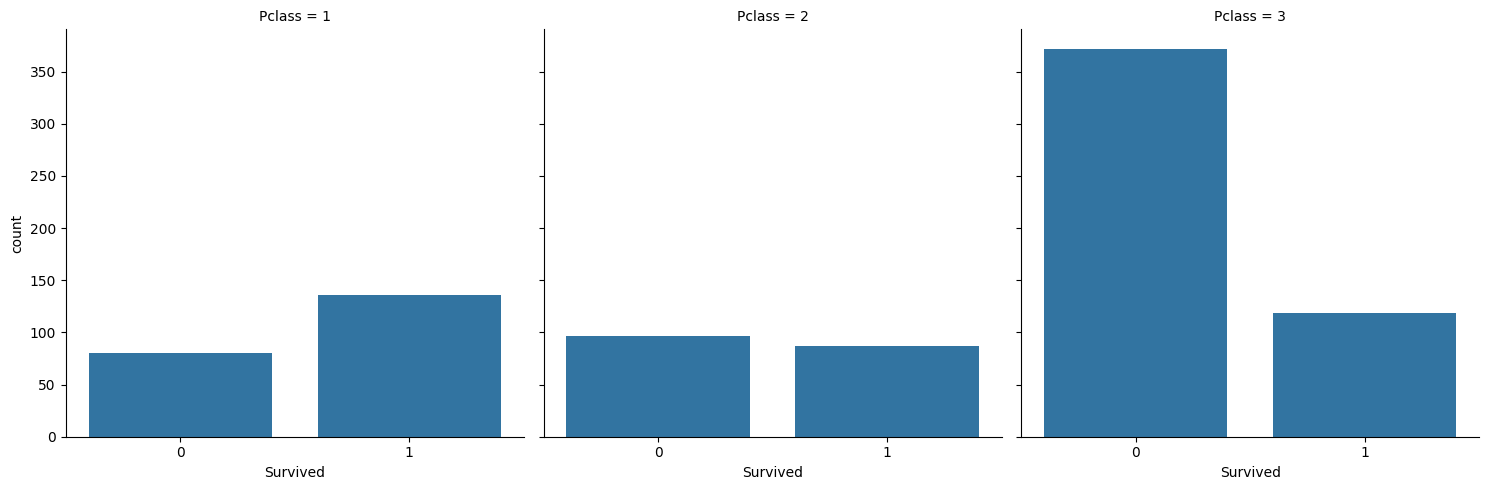

In [99]:
sns.catplot(data, x='Survived', col='Pclass', kind='count')

Таким образом, чем выше класс билета, тем больше была вероятность выжить у пассажира. Проверим, как на эту вероятность влиял пол человека.

In [100]:
sex_tab = pd.crosstab(data.Sex, data.Survived, margins=True)
sex_tab.style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [101]:
print('% of survivals depending on sex')
print('if male =', sex_tab.loc['male', 1] / sex_tab.loc['male', 'All'])
print('if female =', sex_tab.loc['female', 1] / sex_tab.loc['female', 'All'])

% of survivals depending on sex
if male = 0.18890814558058924
if female = 0.7420382165605095


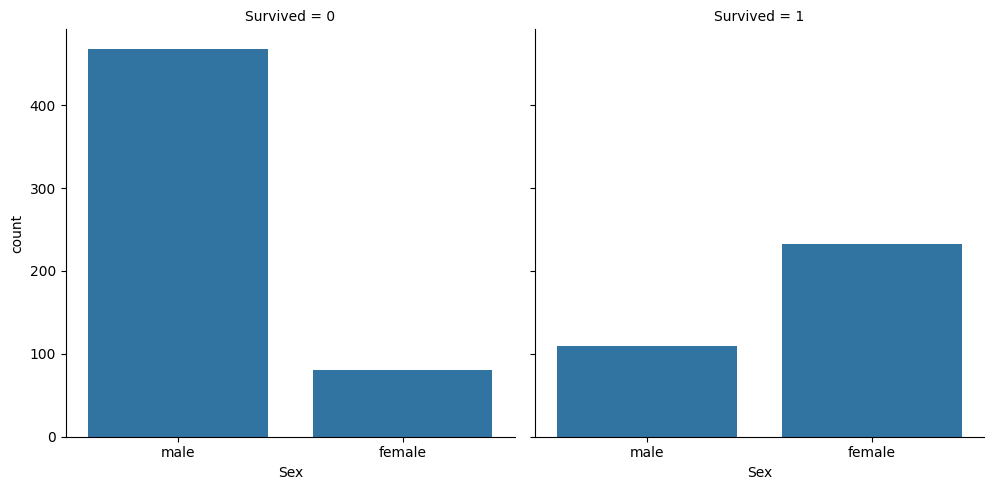

In [102]:
sns.catplot(data, x='Sex', col='Survived', kind='count')

Мы видим, что среди женщин выжило 74%, а среди мужчин лишь 19%. То есть, если пассажир является женщиной, то его шансы выжить значительно увеличиваются

In [103]:
tab2 = pd.crosstab(index=[data.Sex, data.Survived], columns=data.Pclass, margins=True)
tab2.style.background_gradient(cmap='autumn_r')

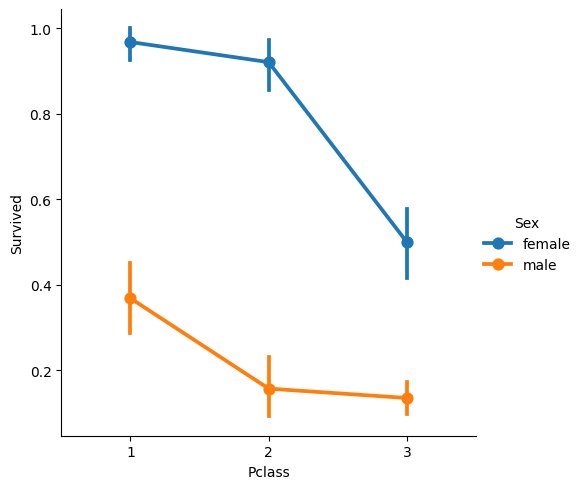

In [104]:
sns.catplot(data, x='Pclass', y='Survived', hue='Sex', kind='point')

Мы можем заметить, что даже среди мужчин 1 класс билета увеличивал вероятность выжить. А для женщин с билетом класса 3 также наблюдается пониженная вероятность выжить в сравнении с женщинами с билетами 1 класса.

In [105]:
tab_embark = pd.crosstab(index=data.Embarked, columns=data.Survived, margins=True)
tab_embark.style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


In [106]:
print('% of surviving depending on Embarkment')
print('C:', tab_embark.loc['C', 1] / tab_embark.loc['C', 'All'])
print('Q:', tab_embark.loc['Q', 1] / tab_embark.loc['Q', 'All'])
print('S:', tab_embark.loc['S', 1] / tab_embark.loc['S', 'All'])

% of surviving depending on Embarkment
C: 0.5535714285714286
Q: 0.38961038961038963
S: 0.33695652173913043


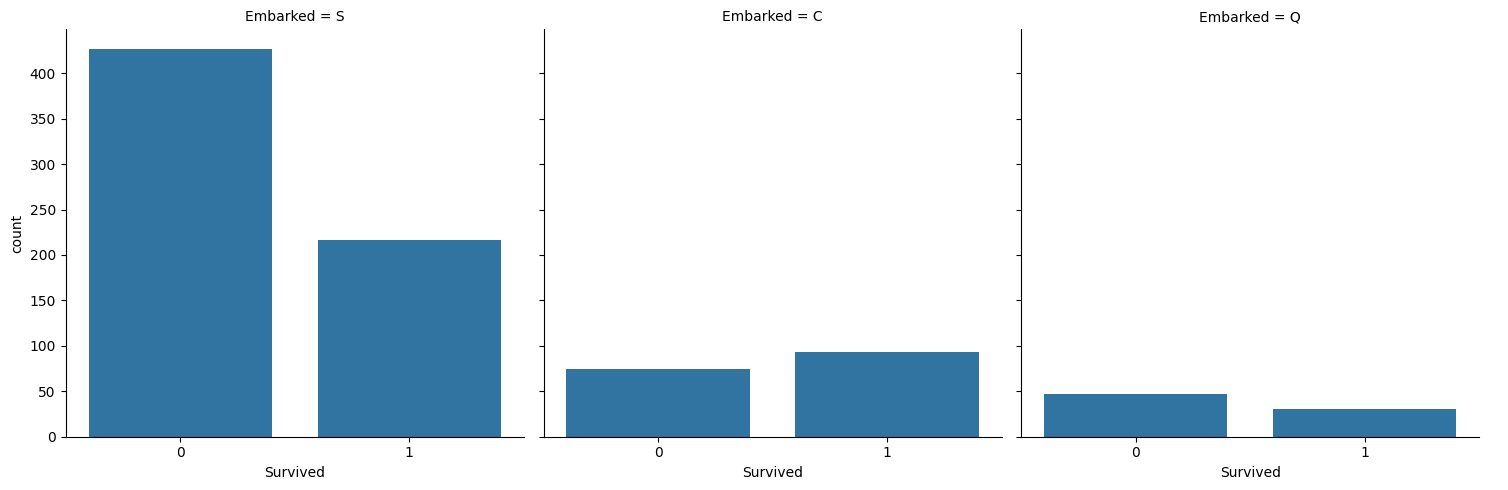

In [107]:
sns.catplot(data, x='Survived', kind='count', col='Embarked')

Благодаря данным мы видим, что больше всего билетов куплено в порте S, а меньше – Q. Меньше всего выживали пассажиры, попавшие на корабль из порта S, а больше всего выживали из порта C

In [108]:
pd.crosstab(data.Survived,[data.Sex, data.Pclass, data.Embarked], margins=True).style.background_gradient(cmap='autumn_r')

In [109]:
# Присваиваем каждому человеку возрастную группу
data['Age_group'] = np.nan
for a in range(8, 0, -1):
    interval = [a * 10 - 10, a * 10]
    data.loc[data.Age.map(lambda age: interval[0] < age <= interval[1]), 'Age_group'] = a
data[['Age', 'Age_group']]

,Age,Age_group
0,22.0,3.0
1,38.0,4.0
2,26.0,3.0
3,35.0,4.0
4,35.0,4.0
...,...,...
886,27.0,3.0
887,19.0,2.0
888,NaN,NaN
889,26.0,3.0


In [110]:
data.groupby(['Age_group', 'Sex']).Survived.apply(lambda x: x.sum()/x.count())

Age_group  Sex   
1.0        female    0.612903
           male      0.575758
2.0        female    0.739130
           male      0.144928
3.0        female    0.753086
           male      0.154362
4.0        female    0.836364
           male      0.230000
5.0        female    0.677419
           male      0.218182
6.0        female    0.928571
           male      0.142857
7.0        female    1.000000
           male      0.071429
8.0        male      0.200000
Name: Survived, dtype: float64

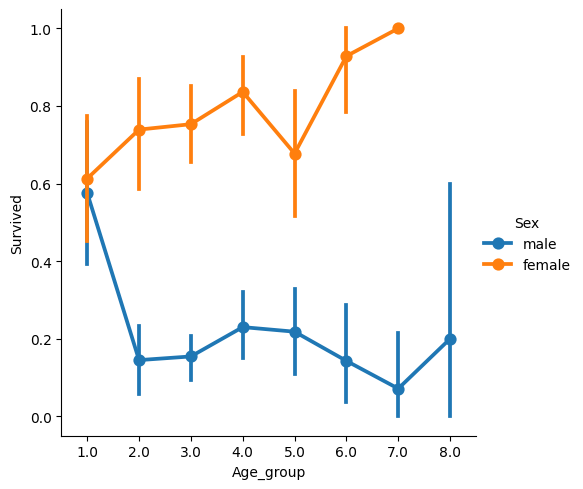

In [111]:
sns.catplot(data, hue='Sex', x='Age_group', y='Survived', kind='point')

Если человек либо ребенок, либо пожилой, то его шансы выжить существенно возрастают, однако для женщин в большем объеме

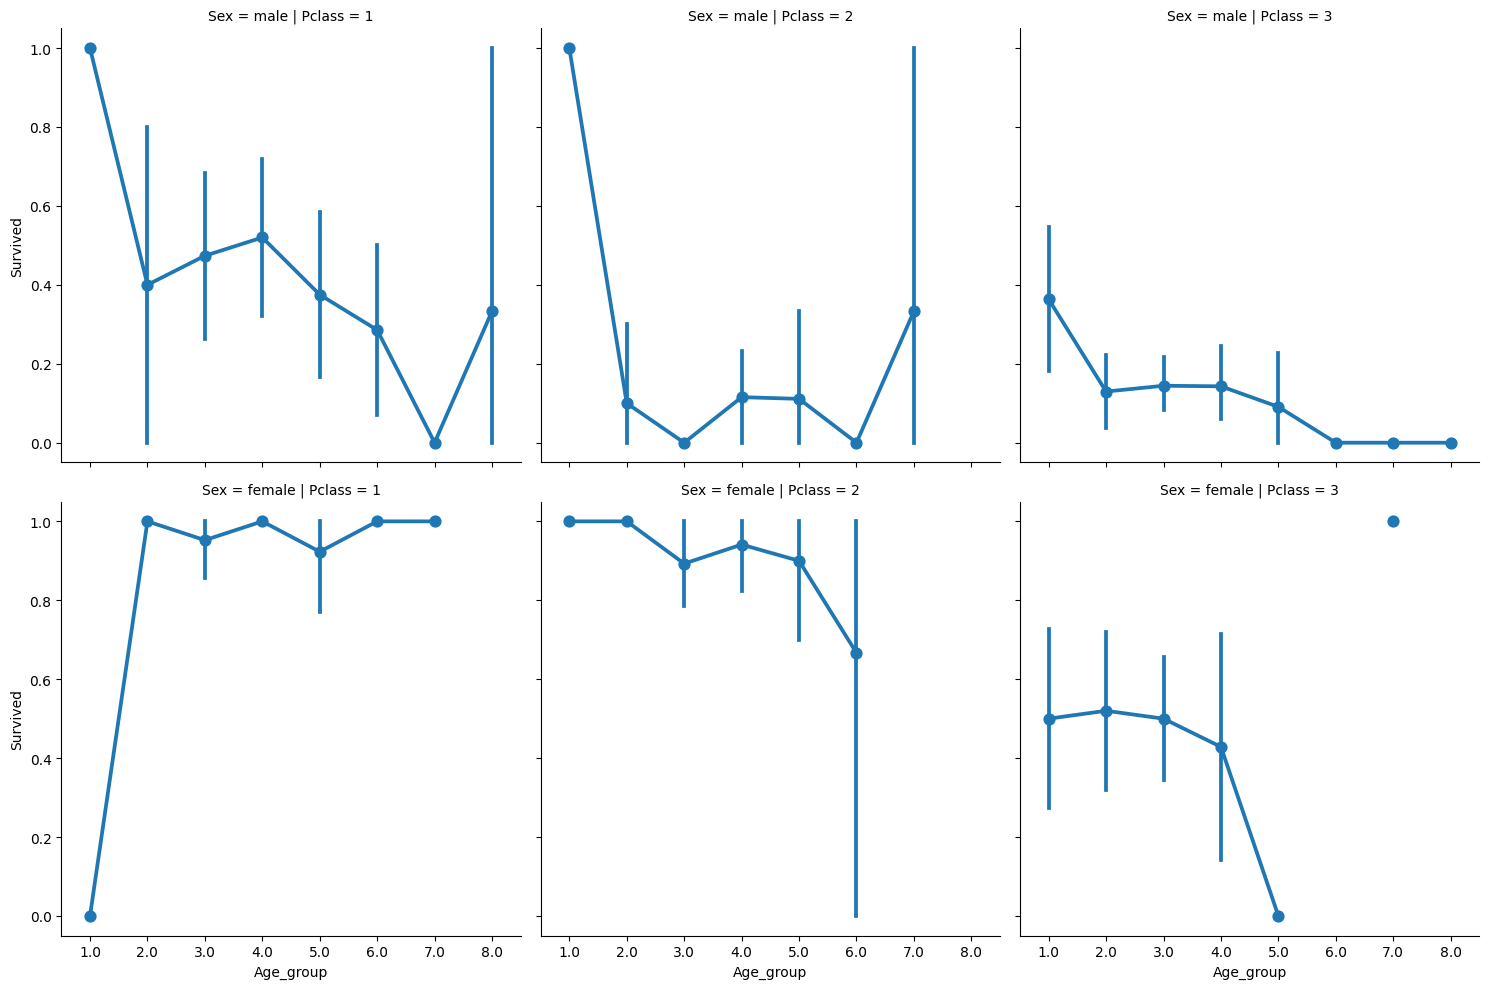

In [112]:
sns.catplot(data, x='Age_group', y='Survived', col='Pclass', row='Sex', kind='point')

Большинство женщин с билетами 1 и 2 класса выжили. У всех людей с билетами 3 класса были маленькие шансы на выживание, но женщин с 3 классом билетов выживало больше, чем мужчин. Мужчины с билетами 1 класса выживали часто. С билетами 2 класса выживали в основном мальчики и пожилые мужчины.

In [113]:
data2 = data.copy()
data2.drop('PassengerId', axis=1, inplace=True)
data2 = pd.get_dummies(data2, columns=['Sex', 'Embarked'])
data2.dropna(inplace=True)
data2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_group,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,3.0,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,4.0,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,3.0,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,4.0,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,4.0,False,True,False,False,True


<Axes: >

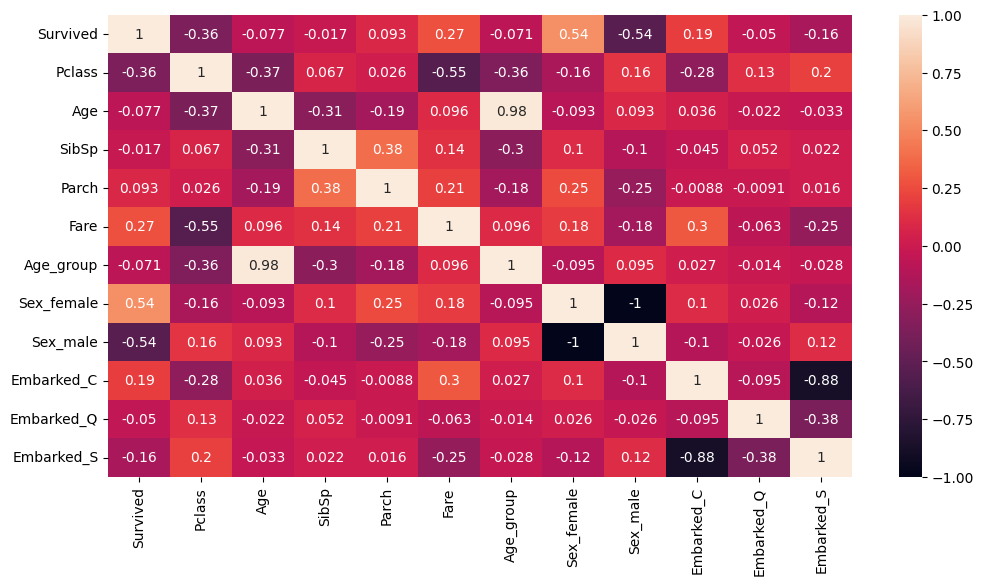

In [114]:
corr = data2.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True)

Благодаря матрице мы можем увидеть, какая есть взаимосвязь между переменными. На выживаемость больше всего влияют класс билета, пол и плата за билет

In [115]:
y = data2.Survived
X = data2.drop(['Survived', 'Age', 'SibSp', 'Parch', 'Fare'], axis=1)
X.shape

(714, 7)

C:\Users\Илья\AppData\Local\Temp\ipykernel_8696\18918342.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  n = res.idxmin()[0]


17


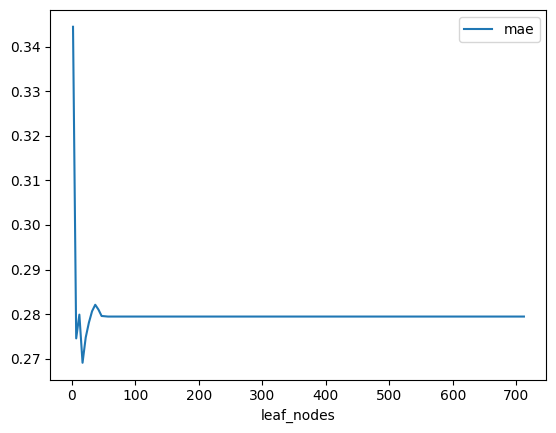

In [116]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)
res = []
for n in range(2, 714, 5):
    model = DecisionTreeRegressor(max_leaf_nodes=n, random_state=0)
    model.fit(train_X, train_y)
    y_pred = model.predict(val_X)
    mae = mean_absolute_error(val_y, y_pred)
    res.append([n, mae])
res = pd.DataFrame(res, columns=['leaf_nodes', 'mae']).set_index('leaf_nodes', drop=True)
sns.lineplot(res)
n = res.idxmin()[0]
print(n)

Мы натренировали модель так, чтобы она показывала наименьшую среднюю абсолютную ошибку. Ошибка минимальна при max_leaf_nodes=17

In [117]:
model = DecisionTreeRegressor(random_state=0, max_leaf_nodes=n).fit(X, y)

In [118]:
X_for_prediction = pd.read_csv('test.csv')
X_for_prediction.set_index('PassengerId', drop=True, inplace=True)
X_for_prediction.describe()


,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [119]:
X_for_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


Не хватает важных для нас данных по возрасту, поэтому заменим недостающие данные на медианные и сгруппируем пассажиров по возрасту

In [120]:
X_for_prediction.Age.fillna(X_for_prediction.Age.median(), inplace=True)
X_for_prediction['Age_group'] = np.nan
for a in range(8, 0, -1):
    interval = [a * 10 - 10, a * 10]
    X_for_prediction.loc[X_for_prediction.Age.map(lambda age: interval[0] < age <= interval[1]), 'Age_group'] = a
X_for_prediction[['Age', 'Age_group']].head()

C:\Users\Илья\AppData\Local\Temp\ipykernel_8696\89869859.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_for_prediction.Age.fillna(X_for_prediction.Age.median(), inplace=True)


,Age,Age_group
PassengerId,,
892,34.5,4.0
893,47.0,5.0
894,62.0,7.0
895,27.0,3.0
896,22.0,3.0


In [121]:
features = ['Pclass', 'Age_group', 'Sex', 'Embarked']
X_for_prediction = pd.get_dummies(X_for_prediction[features], columns=['Sex', 'Embarked'])
X_for_prediction.head()

,Pclass,Age_group,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,
892,3,4.0,False,True,False,True,False
893,3,5.0,True,False,False,False,True
894,2,7.0,False,True,False,True,False
895,3,3.0,False,True,False,False,True
896,3,3.0,True,False,False,False,True


In [122]:
(X_for_prediction.columns == X.columns).all() # Проверка совпадают ли поля матриц

True

In [123]:
y = pd.Series(model.predict(X_for_prediction), index=X_for_prediction.index).map(lambda x: 1 if x >= 0.9 else 0).rename('Survived')
y.head()

PassengerId
892    0
893    0
894    0
895    0
896    0
Name: Survived, dtype: int64

In [124]:
y.to_csv('result.csv')

Так мы получили спрогнозированные значения, выгрузив их в файл result.csv